In [47]:
using DifferentialEquations
using Plots
using Statistics
using LinearAlgebra
using DiffEqParamEstim

In [48]:
phi(a, gamma_a) = a ./ (a + gamma_a)

phi (generic function with 1 method)

In [49]:
function f_old(du,u,p0,t)
    B, E, M, a, h, p = u
    betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q = p0

    du[1]= betab.*phi(u[6],gammap).*u[1] - q.*u[1]
    du[2] = (betaE1.*phi(u[4], gammaa) + betaE2.*(1-phi(u[1], gammaB)).*phi(u[6], gammap)).*u[2] - q.*u[2]
    du[3] = (betaM1.*phi(u[4], gammaa) + betaM2.*phi(u[5], gammah)).*u[3] - q.*u[3]

    du[4] = betaa.*phi(u[6], gammap).*u[1] - q.*u[4] - (muaE.*u[2] + muaM.*u[3]).*u[4]
    du[5] = betah1.*phi(u[4], gammaa).*u[2] + betah2.*phi(u[6], gammap).*u[1] - q.*u[5] - muhM.*u[5].*u[3]
    du[6] = betap.*q.*(cos.(t)+1).^3 - q.*u[6] - (mupB.*u[1] + mupE.*u[2]).*u[6]
end


f_old (generic function with 1 method)

In [50]:
function f(du,u,p0,t)
    B, E, M, a, h, p = u
    betaa, betab, betaE1, betaE2, betah1, betah2,betah3, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q = p0

    du[1]= betab.*phi(p,gammap).*B - q.*B
    du[2] = (betaE1.*phi(a, gammaa) + betaE2.*(1-phi(B, gammaB)).*phi(p, gammap)).*E - q.*E
    du[3] = (betaM1.*phi(a, gammaa) + betaM2.*phi(h, gammah)).*M - q.*M

    du[4] = betaa.*phi(p, gammap).*B - q.*a - (muaE.*E + muaM.*M).*phi(a, gammaa)
    du[5] = betah1.*phi(a, gammaa).*E + betah2.*phi(p, gammap).*B + betah3.*(1-phi(B,gammaB)).*phi(p,gammap)*E- q.*h- muhM.*phi(h, gammah).*M
    du[6] = betap.*q.*(cos.(t)+1).^3 - q.*p - (mupB.*B + mupE.*E).*phi(p, gammap)
end

f (generic function with 1 method)

In [51]:
# betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q
u0 = [0.0004706; 0.0004706; 0.0004706; 9.7079; 7.9551; 32.061]
tspan = (0.0,1500.0);
p = [3e5, # betaa 1e7
    1.2, # betab
    0.8, # betaE1
    0.6, # betaE2
    400, #betah1 150
    33000, #betah2
    10000,  #betah3                   
    0.827, #betaM1 0.8
    0.5, #betaM2
    1000, #betap 10000
    200, #gammaa
    10, # gammaB
    150, #gammah
    400, # gammap 400
    50000, # muaE 25000
    40000, # muaM 50000
    3000, # muhM 400
    200000, #mupB
    5000000, #mupE
    0.05]

# solve the ODE
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob);#, Rosenbrock23())


In [52]:
sol(1400:1500)

t: 1400:1500
u: 101-element Vector{Vector{Float64}}:
 [0.00020953753185344554, 0.0005652175551310916, 0.0012507536294242851, 2.9548771014316966, 6.764293170875527, 15.1564898214139]
 [0.00022011892762518478, 0.00057456638192696, 0.0012376218637103625, 6.409762554611184, 7.310310708079587, 56.938617998741684]
 [0.00024196054442676636, 0.0006080572438790615, 0.0012506384847757257, 10.91091030153134, 8.371475126681618, 39.15780721337753]
 [0.00024253925679237567, 0.0006182221563948144, 0.0012739551905042717, 9.472706356798755, 8.377799325264268, 4.283339184030613]
 [0.000231426407268542, 0.0006068742464763198, 0.00128235551306795, 6.20781941607861, 7.821189199741408, 0.02000196706296904]
 [0.00022014397596408926, 0.0005886725506232609, 0.0012748496597836275, 3.976797026338679, 7.2664724759720976, 0.042090745933674414]
 [0.00021062191929988673, 0.0005688721734030156, 0.00125672309603703, 2.8365012530263707, 6.8108118227843715, 7.287475336258743]
 [0.00021467933313940667, 0.0005678914580435

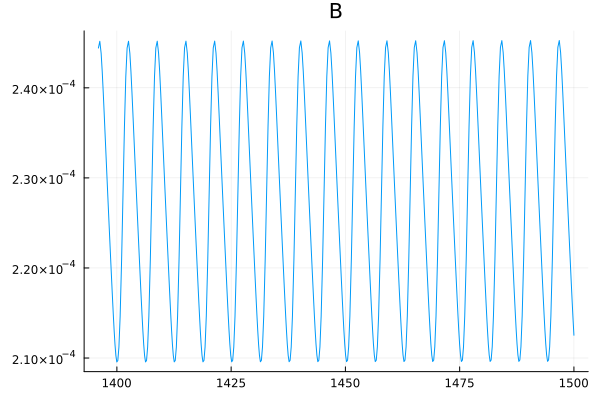

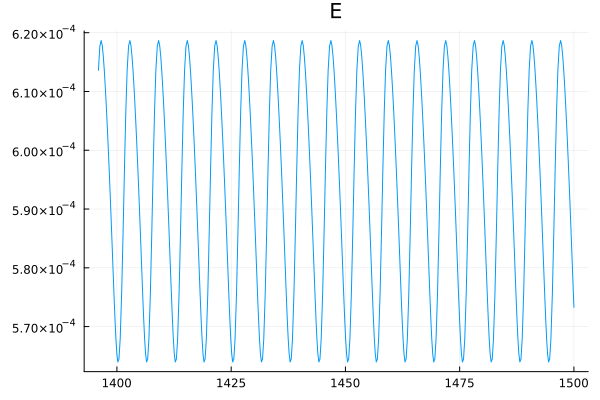

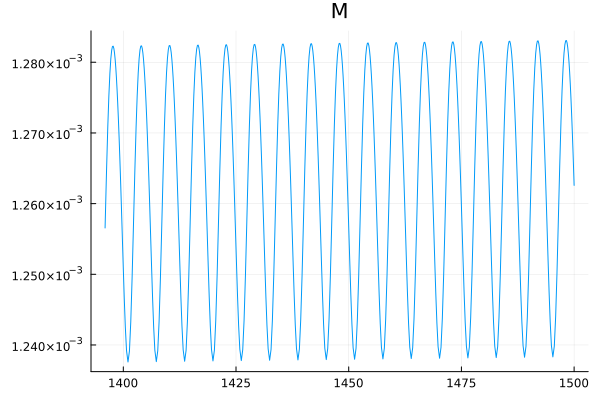

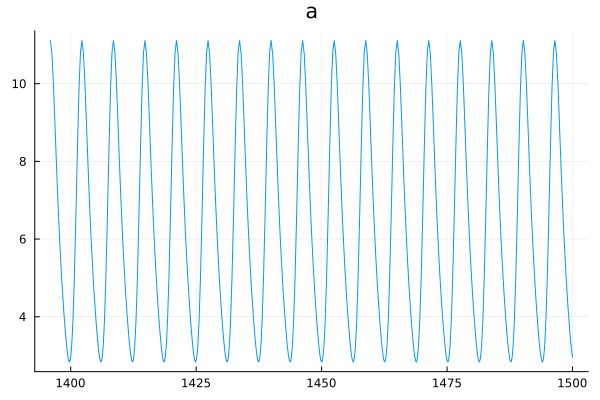

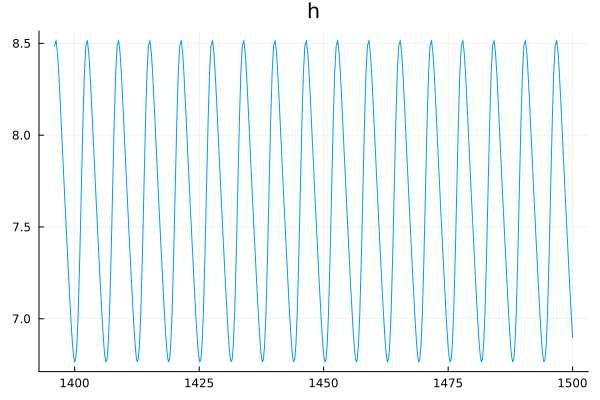

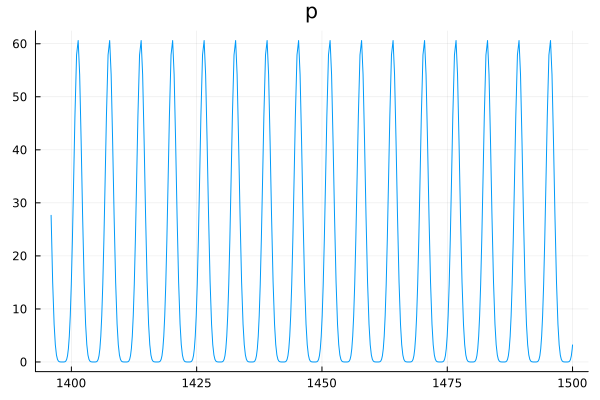

In [53]:
vars = ['B', "E", "M", "a", "h", "p"]
for i in 1:6
    d = plot(sol.t[7239-500:7239], sol[i,7239-500:7239], title = vars[i], legend = false)
    #d = plot(sol.t, sol[i,:], title = vars[i], legend = false)
    display(d)
end

In [54]:
(maximum(sol[:,500:1000], dims=2) + minimum(sol[:,500:1000], dims=2))/2

6×1 Matrix{Float64}:
  0.00022981007844805374
  0.0006017585492707844
  0.0012690155622023694
  6.875143072809616
  7.608221399147947
 30.3572751226978

In [55]:
u0

6-element Vector{Float64}:
  0.0004706
  0.0004706
  0.0004706
  9.7079
  7.9551
 32.061

In [56]:
( 6.875143072809616 -  7.9551) /  7.9551

-0.13575654953305227

# Loss function

$$\text{MAPE}(x,x^\text{obs}) = \frac{1}{4}\sum_{i=1}^4  \left|\frac{x-x^\text{obs}}{x^\text{obs}}\right|,$$

where $x = \left[\frac{1}{3}(\bar B + \bar E + \bar M), \bar a, \bar h, \bar p\right]$, $x^\text{obs} = \left[\frac{1}{3} (B^\text{obs} + E^\text{obs} + M^\text{obs}), a^\text{obs}, h^\text{obs}, p^\text{obs}\right]$, and $\bar z $ for some $z$ can be defined as $\bar z = \frac{1}{2}\big(\text{max}(z_{400:500}) + \text{min}(z_{400:500})\big)$.

In [72]:
function loss(truth, sol, tpts, max_t)#, truth, t_start, t_end, weight)
    """ loss computes MAPE (averaged across timepoints length(sol) - tpts  to length(sol)) and ground truth weighted by a weight vector
    truth (Vector): vector containing the ground truth
    pred (Matrix): matrix with shape (variables, timepoints)
    t_start (integer): first timepoint to pull to compute an average across time
    t_end (integer): last timepoint to pull to compute an average across time
    """
    #return sum((truth-mean(sol[:,t_start:t_end], dims=2)).^2 ./weight )#(u0-mean(sol[:,t_start:t_end], dims=2))./ weight
    
    # compare the average observation for B, E, M and the predicted average center values for B, E, M
    s = abs((sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3]))
    return (s + sum(broadcast(abs, (truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] )))/4
end

center(sol, tpts, max_t) = (maximum(sol((max_t-tpts):max_t), dims=2) + minimum(sol((max_t-tpts):max_t), dims=2))/2

center (generic function with 1 method)

In [73]:
println(abs((sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3]))) 
println(sum(broadcast(abs, (truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] )))

0.47140814660926345
0.3714367260857992


In [74]:
sum(center(sol, tpts,max_t)[1:3,:]) ./sum(truth[1:3])

1.4714081466092634

In [75]:
size(sol[1:3,:])[2]

7239

In [76]:
truth = u0
tpts=500
max_t =1500
#abs(sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3])
sum((truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] )

0.3714367260857992

In [77]:
center(sol, 500,1500)

6×1 Matrix{Float64}:
  0.00022725524312726148
  0.0005912903653177146
  0.001258788412937982
  6.971700034429428
  7.641394489197991
 30.453163592183607

In [78]:
loss(u0, sol, 500, 1500)

0.21071121817376565

In [79]:
# looking at the APE across the 6 variables
s = abs(sum(truth[1:3]) - sum(center(sol, tpts, max_t)[1:3,:])) ./sum(truth[1:3])
s, broadcast(abs, (truth[4:6]-center(sol, tpts, max_t)[4:6,:]) ./ truth[4:6] )

(0.47140814660926345, [0.28185292036079607; 0.03943451506605942; 0.05014929065894367;;])

In [80]:
(0.47140814660926345 + 0.28185292036079607+0.03943451506605942+0.05014929065894367)/4

0.21071121817376565

# Parameter Estimation

In [17]:
using Optim
using Optimization, OptimizationOptimJL

In [18]:
function optim_problem(p, u0)
    max_t = 1500.0
    tspan = (0.0,max_t)
    prob = ODEProblem(f,u0,tspan,p)
    sol = solve(prob, Tsit5(),reltol=1e-6)
    #print(size(sol))
    tpts = 100
    #print(loss(u0, sol, tpts, max_t))
    return loss(u0, sol, tpts, max_t)
end

optim_problem (generic function with 1 method)

In [19]:
#problem = Optimization.OptimizationProblem(optim_problem, u0, p, lb = repeat([0],length(p)), ub = repeat([10000000], length(p)) )
func = OptimizationFunction(optim_problem, Optimization.AutoForwardDiff())

(::OptimizationFunction{true, Optimization.AutoForwardDiff{nothing}, typeof(optim_problem), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing}) (generic function with 1 method)

In [24]:
upper_b =  [1e6, 10,10,10,1000,1e5,  1e5,10,10,1e5,1e4,1e4,1e4,1e4,1e6,1e6,1e5,1e8,1e8,10]# 
#upper_b = repeat([1e8],20)
problem = Optimization.OptimizationProblem(func,  p, u0, lb = repeat([0],length(p)),   ub = upper_b)

OptimizationProblem. In-place: true
u0: 20-element Vector{Float64}:
 300000.0
      1.2
      0.8
      0.6
    400.0
  33000.0
  10000.0
      0.827
      0.5
   1000.0
    200.0
     10.0
    150.0
    400.0
  50000.0
  40000.0
   3000.0
 200000.0
      5.0e6
      0.05

In [25]:
param_est_sol = solve(problem,Optim.NelderMead())

LoadError: InterruptException:

In [22]:
optim_problem(param_est_sol, u0)

-0.3094875070696064

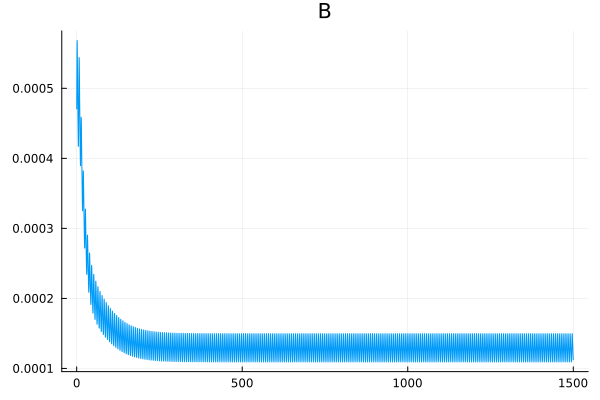

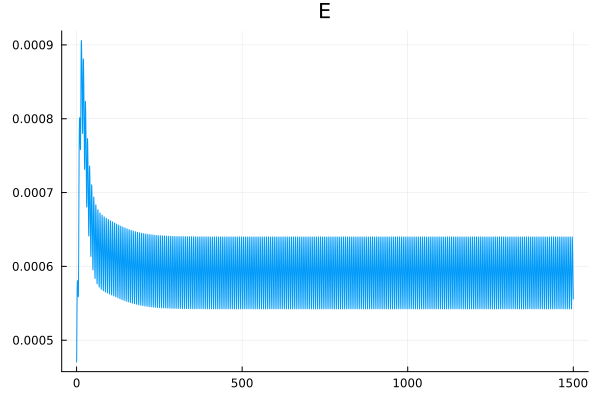

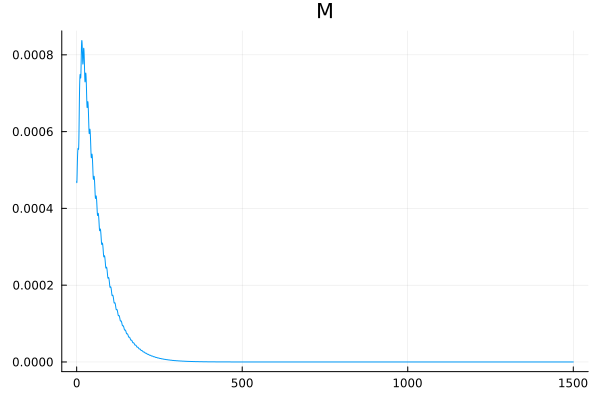

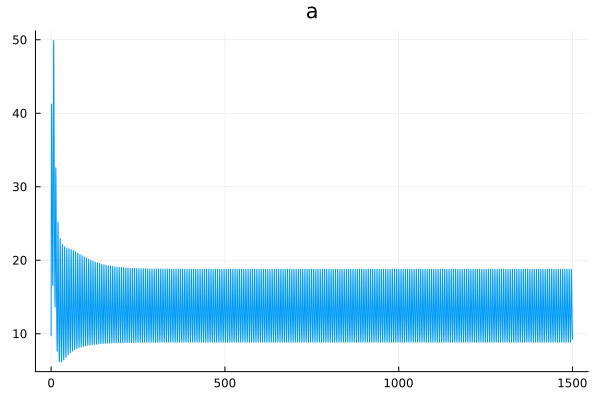

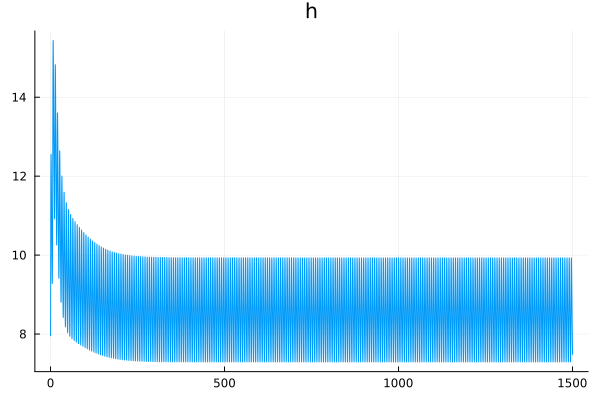

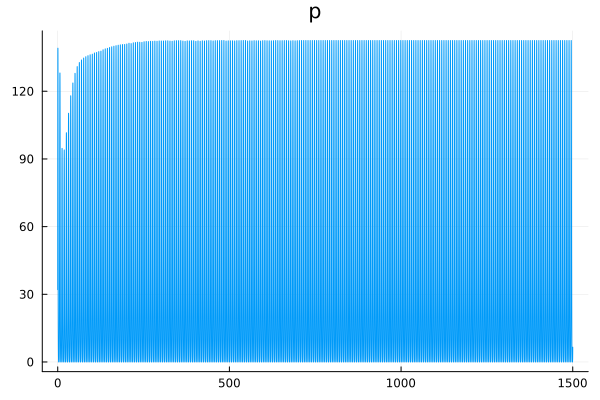

In [23]:
prob = ODEProblem(f,u0,tspan,param_est_sol)
sol = solve(prob, Tsit5(),reltol=1e-6)
vars = ['B', "E", "M", "a", "h", "p"]
for i in 1:6
    d = plot(sol.t, sol[i,:], title = vars[i], legend = false)
    #d = plot(sol.t, sol[i,:], title = vars[i], legend = false)
    display(d)
end

In [ ]:
#constrained simulated annealing

solve(problem,Optim.SAMIN(), f_tol = 1e-1) #Optim.SimulatedAnnealing()) #

### turing

In [ ]:
using Distributions
using Turing
using Random
Random.seed!(14);

In [ ]:
@model function fit(data, prob)
    # Prior distributions.
    σ ~ InverseGamma(2, 3)
    betaa
    betab
    betaE1
    betaE2
    betah1
    betah2
    betaM1
    betaM2
    betap
    gammaa
    gammaB
    gammah
    gammap
    muaE
    muaM
    muhM
    mupB
    mupE
    q 
    
    
    p = [betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q ]
    predicted = solve(prob, Tsit5(); p=p, saveat=0.1)

    # Observations.
    for i in 1:length(predicted)
        data[:, i] ~ MvNormal(predicted[i], σ^2 * I)
    end

    return nothing
end

model = fit(data, prob)

# Sample 3 independent chains with forward-mode automatic differentiation (the default).
chain = sample(model, NUTS(0.65), MCMCSerial(), 1000, 3; progress=false)